# import

In [1]:
#import 
## import functions from .py utils file: 
from Utilities.single_session_functions import *

# Set paths and params

In [2]:


#Set paths 
# list of animals to process, can one or multiple animals eg. ['mouse1','mouse2', etc.]
Animal_ID = ['EJT100']

# input path should be where the data from 1_process_bpod_ouput was saved 
InputPath = (r'D:\Behavioural_data_output\\')
# usually you want this to be the same as the input path
OutputPath = (r'D:\Behavioural_data_output\\')



# main script

00_20210503_152617_Mon
01_20210504_130853_Tue
02_20210505_150127_Wed
03_20210506_130707_Thu
04_20210507_124355_Fri
05_20210510_163634_Mon
06_20210511_130108_Tue
07_20210512_142005_Wed
08_20210513_132308_Thu
09_20210514_135821_Fri
10_20210517_140010_Mon
11_20210518_145854_Tue
12_20210520_113831_Thu
13_20210521_130841_Fri
14_20210524_113227_Mon
15_20210525_110423_Tue
16_20210526_121530_Wed
17_20210527_125621_Thu
18_20210528_130246_Mon
19_20210531_141633_Mon
20_20210601_115359_Tue
21_20210602_112555_Wed
22_20210604_141852_Fri
23_20210605_151407_Sat
24_20210607_104140_Mon
25_20210608_133449_Tue
26_20210609_103018_Wed
27_20210610_094933_Thu
28_20210611_094326_Fri
29_20210614_085710_Mon
30_20210615_093008_Tue
31_20210616_093103_Wed
32_20210617_101225_Thu
33_20210618_110451_Fri
34_20210621_092700_Mon


c:\miniconda\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\miniconda\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: min() iterable argument is empty

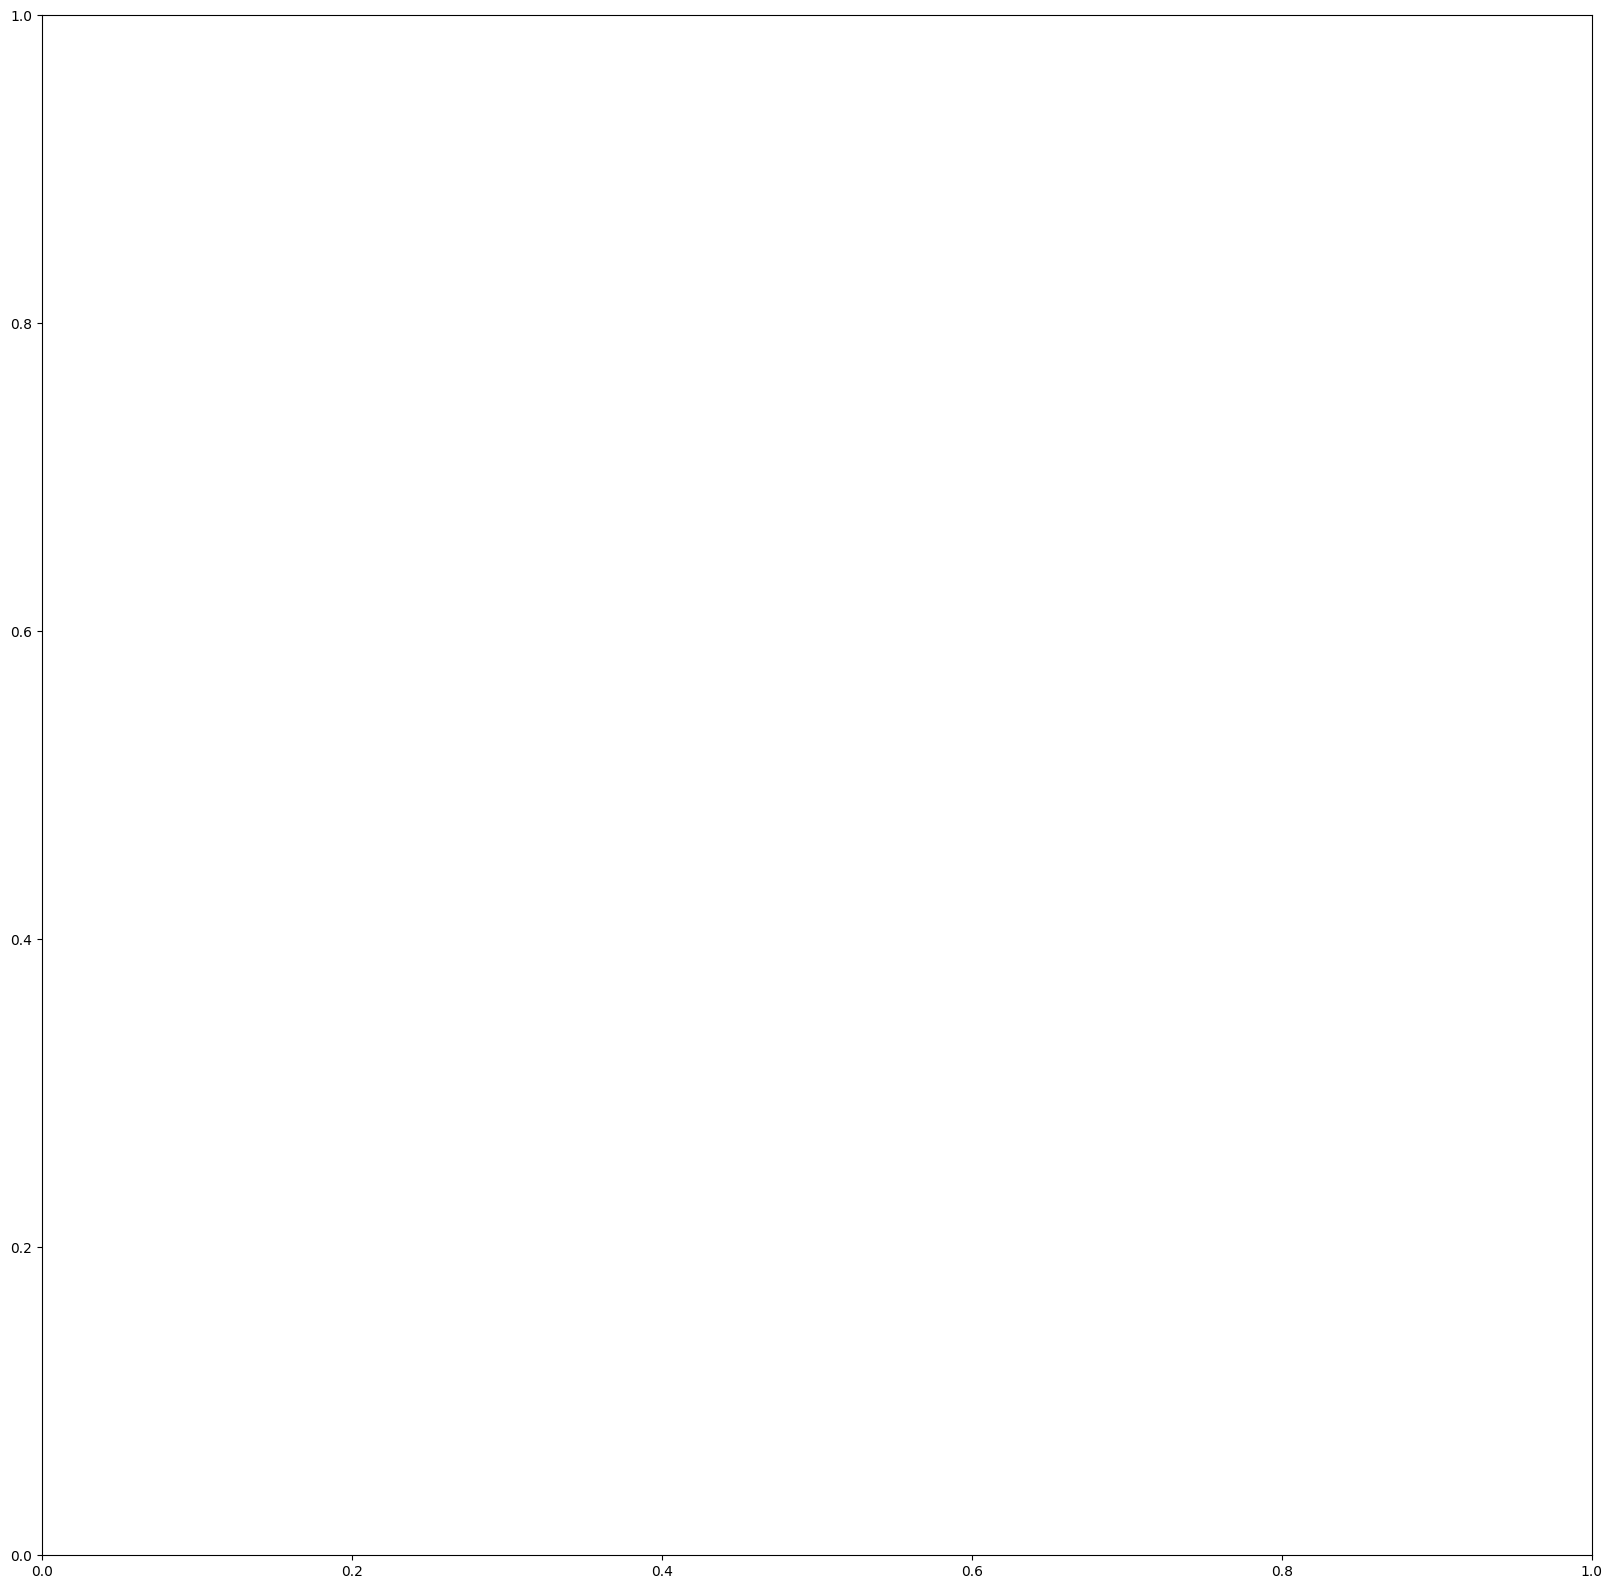

In [3]:

# reloads imports (utils) if something changes
%reload_ext autoreload
%autoreload 2

#### MAIN ####
for Animal_index, CurrentAnimal in enumerate(Animal_ID):
    display(HTML(f"<b>Processing data for: {CurrentAnimal}</b>"))
    InputPathCurrent = (InputPath + CurrentAnimal)
    if os.path.isdir(InputPathCurrent):
        for file in os.listdir(InputPathCurrent+ '\\Preprocessed\\'):
            print(file)
            #load in data for given Animal and session:
            CurrentInputPath = (InputPathCurrent + '\\Preprocessed\\'+file+'\\')
            Session_data =  pd.read_csv((CurrentInputPath+'PreProcessed_SessionInfo.csv'))
            poke_data =  pd.read_csv((CurrentInputPath+'PreProcessed_RawPokeData.csv'))
            transition_data =  pd.read_csv((CurrentInputPath+'PreProcessed_TransitionData.csv'))
            timefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_timefilteredonly_df.csv'))
            P1alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port1aligned.csv'))
            P2alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port2aligned.csv'))
            P3alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port3aligned.csv'))
            P4alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port4aligned.csv'))
            P5alignedtimefiltseqs_data =  pd.read_csv((CurrentInputPath+'PreProcessed_Sequence_df_timefiltered_port5aligned.csv'))
            
            #experiment type:
            Experiment_type = 'Auto'
            
            #Plot transition times:
            #pull data from dfs:
            Time_filter = np.array(transition_data.loc[:,'2s_Time_Filter_out_in'])
            TransitionTypes_unfilt = np.array(transition_data.loc[:,'Transition_type'])
            TransitionLatency_unfilt = np.array(transition_data.loc[:,'out_in_Latency'])
            # filter out transitions that are too slow (defined in preprocessing as 2s)
            TransitionTypes_Tfilt = list(TransitionTypes_unfilt[Time_filter==1])
            TransitionLatency_Tfilt = list(TransitionLatency_unfilt[Time_filter==1])
            # determine ports for each transition 
            Transitions = []
            Transitions = Transitions + list(np.array(Session_data.loc[:,'Transition1']))
            Transitions = Transitions + list(np.array(Session_data.loc[:,'Transition2']))
            Transitions = Transitions + list(np.array(Session_data.loc[:,'Transition3']))
            Transitions = Transitions + list(np.array(Session_data.loc[:,'Transition4']))
            
            # plot_transition_times, call function 
            plot_transition_times(TransitionLatency_Tfilt, TransitionTypes_Tfilt, Transitions, CurrentAnimal, file, Experiment_type, InputPathCurrent)

            # plot transition times plot 2
            plot_transition_times2(TransitionLatency_Tfilt, TransitionTypes_Tfilt, Transitions, CurrentAnimal, file, Experiment_type, InputPathCurrent)
                
            # plot transition trajectories
            plot_transition_trajectories(timefiltseqs_data, Session_data, CurrentAnimal, file, Experiment_type, InputPathCurrent)

            TimeFiltered_seqs = list(timefiltseqs_data.loc[:, 'Sequence_ids'])
            transition_number = determineTransitionNumber(TimeFiltered_seqs)
            port1 = list(Session_data.loc[:, 'Port1'])[0]
            port2 = list(Session_data.loc[:, 'Port2'])[0]
            port3 = list(Session_data.loc[:, 'Port3'])[0]
            port4 = list(Session_data.loc[:, 'Port4'])[0]
            port5 = list(Session_data.loc[:, 'Port5'])[0]
            ## Tanrasition Heatmap Plot:   
            plot_transition_heatmap(transition_number, port1, port2, port3, port4, port5, CurrentAnimal, file, Experiment_type, InputPathCurrent)
            
            ##### Plot poke proportions 
            a = np.array([0,1,2,3,4,5,6,7])
            a = np.delete(a, [port1-1,port2-1,port3-1,port4-1,port5-1])
            new_order = [port1-1] + [port2-1] + [port3-1] + [port4-1] + [port5-1] + list(a)
            df = plot_poke_proportions(transition_data, TransitionLatency_unfilt, file, Experiment_type, CurrentAnimal, InputPathCurrent, port1, P1alignedtimefiltseqs_data, new_order)

            ##############################################################################

            trial_split_data = dict(tuple(df.groupby('index')))


            from scipy.optimize import curve_fit

            def gaussian(x, mean, amplitude, standard_deviation):
                return amplitude * np.exp( - (x - mean)**2 / (2*standard_deviation ** 2))

            colors = ['#E6BFC4','#285CA6','#219CC1','#A4D3B6','#ECEFB6','#E6BFC4']

            f, ax = plt.subplots(figsize=(10, 10))
            bins_number=100
            for i in trial_split_data:
                if i > 0:
                    x = list(trial_split_data[i]['Time'])

                    bin_heights, bin_borders, _ = plt.hist(x, bins=bins_number, label='histogram', color = colors[i], alpha = 0.4)
                    bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
                    try:
                        popt, _ = curve_fit(gaussian, bin_centers, bin_heights, p0=[1., 0., 1.])
                        x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
                        plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='fit', color = colors[i],linewidth = 2)
                    except Exception:
                        pass

            ax.set_xlim(0,2)

            #save
            SaveFig((CurrentAnimal + '_' + file+'_' + Experiment_type[0][2::] +'_' + 'Port1FittedHistogram_pokeInTimes_Plot.png'),InputPathCurrent + '\\SingleSessions\\' + file + '\\')  

            #########################################################################
            ## Plot transition proportions. Take all transitions that are time filtered (>2s) and decide if they are correct, errors (seq relevant port to wrong place) or neutral (non relevant port to anywhere or repeated poke)

            TrialStartRefs = []
            for i in range(len(timefiltseqs_data.loc[:,'SessionTime_Reference'])):
                TrialStartRefs = TrialStartRefs + literal_eval(timefiltseqs_data.loc[:,'SessionTime_Reference'][i])

            Correct_proportion,Error_proportion,Neutral_proportion,x_refs = return_sequence_accuracy_props(list(timefiltseqs_data.loc[:,'Sequence_ids']),TrialStartRefs)


            fig, ax = plt.subplots(1, 1,figsize=(20,10))

            ax.set_title(('Transition Proportions'), loc = 'left',fontsize = 20,pad = 30, color = 'red')
            ax.plot(x_refs,convolve_movmean(Correct_proportion,30),'o-',linewidth=2,markersize = 7)
            ax.plot(x_refs,convolve_movmean(Error_proportion,30),'o-', color = 'red',linewidth=2,markersize = 7)
            ax.plot(x_refs,convolve_movmean(Neutral_proportion,30),'o-',color = 'grey',linewidth=2,markersize = 7)


            patch1 = mpatches.Patch(color='blue', label=('Correct'))
            patch2 = mpatches.Patch(color='red', label=('Error'))
            patch3 = mpatches.Patch(color='grey', label=('Neutral'))
            ax.legend(handles=[patch1,patch2,patch3],frameon=False)

            ax.set_ylim([0, 1])

            ax.set_xlabel('Time',fontsize = 15)
            ax.set_ylabel('Proportion',fontsize = 15)

            SaveFig((CurrentAnimal + '_' + file+'_' + Experiment_type[0][2::] +'_' + 'TransitionProportions.png'),InputPathCurrent + '\\SingleSessions\\' + file + '\\')
            
            ################################# Repeat pokes included data: ###########################################
            
            ## Heatmap plots with repeate pokes

            Port_transits = determime_heatmapdata(determineTransitionNumber(list(timefiltseqs_data.loc[:,'Sequence_ids'])),port1,port2,port3,port4)

            a = np.array([0,1,2,3,4,5,6,7])
            a = np.delete(a, [port1-1,port2-1,port3-1,port4-1,port5-1])
            new_order = [port1-1] + [port2-1] + [port3-1] + [port4-1] + [port5-1] + list(a)

            Port_transits = reversedata(Port_transits,new_order)    
            x_axis_labels = ['Port 1','Port 2','Port 3','Port 4'] # labels for x-axis
            y_axis_labels = ['Port Z','Port Y','Port X','Port 5','Port 4','Port 3','Port 2','Port 1'] # labels for y-axis
            labels =  np.array([['','','',''],
                                ['','','',''],
                                ['','','',''],
                                ['','','','T4'],
                                ['','','T3',''],
                                ['','T2','',''],
                                ['T1','','',''],
                                ['','','','']])

            mask = np.zeros_like(Port_transits)

            #plot:
            with sns.axes_style("white"):
                fig, ax = plt.subplots(1, 1, figsize=(10, 10))
                h1 = sns.heatmap(Port_transits,xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
                                linewidths=.5, mask=mask, square=True,cmap="YlGnBu",annot = labels,fmt = '',cbar_kws = dict(use_gridspec=False,location="right"))

            #add seprrating line:
            ax.hlines([3], *ax.get_ylim())
            ax.set_ylabel('End Port',size = 20)
            ax.set_xlabel('Start Port',size = 20)

            SaveFig((CurrentAnimal + '_' + file+'_' + Experiment_type[0][2::] +'_' + 'HeatMap_RepeatPokesIncluded.png'),InputPathCurrent + '\\SingleSessions\\' + file + '\\Repeat_Poke_Data\\')

            ############### Plot transition trajectories with repeat pokes ####################

            port1 =  2
            port2 =  1   
            port3 =  6
            port4 =  3   
            port5 =  7   

 
            #determine numbers of transitons (time filtered sequences + repeat pokes removed)
            transition_number = determineTransitionNumber(list(timefiltseqs_data.loc[:,'Sequence_ids']))

            # set xy coords of each trajectory:
            x = ([1,1], [1,2], [1,3], [1,4], [1,1], [1,2], [1,3], [1,4],
                [2,1], [2,2], [2,3], [2,4], [2,1], [2,2], [2,3], [2,4],
                [3,1], [3,2], [3,3], [3,4], [3,1], [3,2], [3,3], [3,4],
                [4,1], [4,2], [4,3], [4,4], [4,1], [4,2], [4,3], [4,4],
                [1,1], [1,2], [1,3], [1,4], [1,1], [1,2], [1,3], [1,4],
                [2,1], [2,2], [2,3], [2,4], [2,1], [2,2], [2,3], [2,4],
                [3,1], [3,2], [3,3], [3,4], [3,1], [3,2], [3,3], [3,4],
                [4,1], [4,2], [4,3], [4,4], [4,1], [4,2], [4,3], [4,4])
            y = ([1,0.5], [1,1], [1,1], [1,1], [1,2], [1,2], [1,2], [1,2],
                [1,1], [1,0.5], [1,1], [1,1], [1,2], [1,2], [1,2], [1,2],
                [1,1], [1,1], [1,0.5], [1,1], [1,2], [1,2], [1,2], [1,2],
                [1,1], [1,1], [1,1], [1,0.5], [1,2], [1,2], [1,2], [1,2],
                [2,1], [2,1], [2,1], [2,1], [2,2.5], [2,2], [2,2], [2,2],
                [2,1], [2,1], [2,1], [2,1], [2,2], [2,2.5], [2,2], [2,2],
                [2,1], [2,1], [2,1], [2,1], [2,2], [2,2], [2,2.5], [2,2],
                [2,1], [2,1], [2,1], [2,1], [2,2], [2,2], [2,2], [2,2.5])

            nrow = 1 
            ncol = 5
            fig, axs = plt.subplots(nrow, ncol,figsize=(50, 10))

            count = 0
            for ind, ax in enumerate(fig.axes):
                ax.tick_params(axis='both', which='major', labelsize=10)
                ax.axis('off')
                ax.set_ylim([0, 5])
                ax.set_xlim([0, 5])

                count = count + 1

                Colours = ['black', 'firebrick', 'grey']

                #Add port reference circles
                circle1 = plt.Circle((1, 1), 0.3, color=Colours[0],fill=False, linewidth=5)
                circle2 = plt.Circle((2, 1), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle3 = plt.Circle((3, 1), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle4 = plt.Circle((4, 1), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle5 = plt.Circle((1, 2), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle6 = plt.Circle((2, 2), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle7 = plt.Circle((3, 2), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle8 = plt.Circle((4, 2), 0.3, color=Colours[2],fill=False, linewidth=5)

                circle9 = plt.Circle((1, 1), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle10 = plt.Circle((2, 1), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle11 = plt.Circle((3, 1), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle12 = plt.Circle((4, 1), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle13 = plt.Circle((1, 2), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle14 = plt.Circle((2, 2), 0.3, color=Colours[0],fill=False, linewidth=5)
                circle15 = plt.Circle((3, 2), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle16 = plt.Circle((4, 2), 0.3, color=Colours[2],fill=False, linewidth=5)

                circle17 = plt.Circle((1, 1), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle18 = plt.Circle((2, 1), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle19 = plt.Circle((3, 1), 0.3, color=Colours[0],fill=False, linewidth=5)
                circle20 = plt.Circle((4, 1), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle21 = plt.Circle((1, 2), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle22 = plt.Circle((2, 2), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle23 = plt.Circle((3, 2), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle24 = plt.Circle((4, 2), 0.3, color=Colours[2],fill=False, linewidth=5)

                circle25 = plt.Circle((1, 1), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle26 = plt.Circle((2, 1), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle27 = plt.Circle((3, 1), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle28 = plt.Circle((4, 1), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle29 = plt.Circle((1, 2), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle30 = plt.Circle((2, 2), 0.3, color=Colours[2],fill=False, linewidth=5)
                circle31 = plt.Circle((3, 2), 0.3, color=Colours[0],fill=False, linewidth=5)
                circle32 = plt.Circle((4, 2), 0.3, color=Colours[2],fill=False, linewidth=5)

                circle33 = plt.Circle((1, 1), 0.3, color=Colours[0],fill=False, linewidth=5)
                circle34 = plt.Circle((2, 1), 0.3, color=Colours[0],fill=False, linewidth=5)
                circle35 = plt.Circle((3, 1), 0.3, color=Colours[0],fill=False, linewidth=5)
                circle36 = plt.Circle((4, 1), 0.3, color=Colours[0],fill=False, linewidth=5)
                circle37 = plt.Circle((1, 2), 0.3, color=Colours[0],fill=False, linewidth=5)
                circle38 = plt.Circle((2, 2), 0.3, color=Colours[0],fill=False, linewidth=5)
                circle39 = plt.Circle((3, 2), 0.3, color=Colours[0],fill=False, linewidth=5)
                circle40 = plt.Circle((4, 2), 0.3, color=Colours[0],fill=False, linewidth=5)


                if count < 5:
                    ax.text(0.7,2.7,('Transitions from port ' + str(count)),fontsize = 25, color = 'k')
                else: 
                    ax.text(0.7,2.7,('Transition from all ports'),fontsize = 25, color = 'k')  

                if count == 1:
                    ax.add_artist(circle1), ax.add_artist(circle2), ax.add_artist(circle3),ax.add_artist(circle4),ax.add_artist(circle5),ax.add_artist(circle6),ax.add_artist(circle7),ax.add_artist(circle8)
                elif count == 2:
                    ax.add_artist(circle9),ax.add_artist(circle10),ax.add_artist(circle11),ax.add_artist(circle12),ax.add_artist(circle13),ax.add_artist(circle14),ax.add_artist(circle15),ax.add_artist(circle16)
                elif count == 3:
                    ax.add_artist(circle25),ax.add_artist(circle26),ax.add_artist(circle27),ax.add_artist(circle28),ax.add_artist(circle29),ax.add_artist(circle30),ax.add_artist(circle31),ax.add_artist(circle32)
                elif count == 4:
                    ax.add_artist(circle17),ax.add_artist(circle18),ax.add_artist(circle19),ax.add_artist(circle20),ax.add_artist(circle21),ax.add_artist(circle22),ax.add_artist(circle23),ax.add_artist(circle24)
                elif count == 5:
                    ax.add_artist(circle33),ax.add_artist(circle34),ax.add_artist(circle35),ax.add_artist(circle36),ax.add_artist(circle37),ax.add_artist(circle38),ax.add_artist(circle39),ax.add_artist(circle40)

                if count == 1: 
                    port = port1
                if count == 2: 
                    port = port2
                if count == 3:
                    port = port3
                if count == 4: 
                    port = port4
                if port > 4:
                    a = port - 4
                    b = 2
                else: 
                    a = port
                    b = 1
                REF_circle = plt.Circle((a, b), 0.3, color=Colours[1],fill=False, linewidth=5)

                if count == 1: 
                    ax.add_artist(REF_circle)
                    normalise = max(transition_number[((port1*8)-8):((port1*8)-8)+8])
                    for i in range(((port1*8)-8),((port1*8)-8)+8): 
                        ax.plot(x[i],y[i],markersize = 130 , markeredgewidth=0.001, color= 'firebrick', marker='None',linewidth=(5*(transition_number[i]/normalise)))  
                        ax.plot(x[i][1],y[i][1],'o',color = 'firebrick',alpha = 0.3,markersize = (60*(transition_number[i]/normalise)))
                if count == 2:
                    ax.add_artist(REF_circle)
                    normalise = max(transition_number[((port2*8)-8):((port2*8)-8)+8])
                    for i in range(((port2*8)-8),((port2*8)-8)+8): 
                        ax.plot(x[i],y[i],markersize = 130 , markeredgewidth=0.001, color= 'firebrick', marker='None',linewidth=(5*(transition_number[i]/normalise))) 
                        ax.plot(x[i][1],y[i][1],'o',color = 'firebrick',alpha = 0.3,markersize = (60*(transition_number[i]/normalise)))
                if count == 3: 
                    ax.add_artist(REF_circle)
                    normalise = max(transition_number[((port3*8)-8):((port3*8)-8)+8])
                    for i in range(((port3*8)-8),((port3*8)-8)+8): 
                        ax.plot(x[i],y[i],markersize = 130 , markeredgewidth=0.001, color= 'firebrick', marker='None',linewidth=(5*(transition_number[i]/normalise))) 
                        ax.plot(x[i][1],y[i][1],'o',color = 'firebrick',alpha = 0.3,markersize = (60*(transition_number[i]/normalise)))
                if count == 4: 
                    ax.add_artist(REF_circle)
                    normalise = max(transition_number[((port4*8)-8):((port4*8)-8)+8])
                    for i in range(((port4*8)-8),((port4*8)-8)+8): 
                        ax.plot(x[i],y[i],markersize = 130 , markeredgewidth=0.001, color= 'firebrick', marker='None',linewidth=(5*(transition_number[i]/normalise))) 
                        ax.plot(x[i][1],y[i][1],'o',color = 'firebrick',alpha = 0.3,markersize = (60*(transition_number[i]/normalise)))

                if count == 5:
                    for i in range(len(transition_number)):
                        normalise = max(transition_number)  
                        ax.plot(x[i],y[i],markersize = 130 , markeredgewidth=0.001, color= 'firebrick', marker='None',linewidth=(5*(transition_number[i]/normalise))) 

                if count == 2:
                    ax.plot(1,3.5,'o',color = 'firebrick',alpha = 0.3,markersize = 60) 
                    ax.text(1.3,3.45,('=  ' + str(normalise)+'  transitions'),fontsize = 25, color = 'k') 

            SaveFig((CurrentAnimal + '_' + file+'_' + Experiment_type[0][2::] +'_' + 'TransitionDiagrams_RepeatPokesIncluded.png'),InputPathCurrent + '\\SingleSessions\\' + file + '\\Repeat_Poke_Data\\')
            
    else:
        print('ERROR: No preprocessed files for ' + CurrentAnimal)
        
print('finished')